<a href="https://colab.research.google.com/github/danisimoneaux/IS4487/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dani Simoneaux

# IS 4487 Lab 9

## Agenda

- Create a new variable called "Income_Level".   Use the income variable to put customers in to groups from $0-$100K, $101-200K, etc.

- Create a new variable called "Satisfaction_Level".  Use the reported_satisfaction variable to put customers into groups of High, Medium, Low.  Make this a categorical variable.  

- Create a bar chart, histogram, or scatter for at least three variables, showing their relationship with the target variable

#Load Libraries

In [2]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import numpy as np

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/megatelco.csv', encoding='Latin1')

print (df)

Mounted at /content/gdrive
     college  income  overage  leftover   house  handset_price  \
0        one   23859       70         0  519105            154   
1       zero   72466       67        16  271182            262   
2       zero   30883       60         0  647281            211   
3        one   44512        0        22  754958            232   
4       zero   70535        0         0  653421            310   
...      ...     ...      ...       ...     ...            ...   
4995    zero   93699       26        56  385632            384   
4996    zero   25806       67        87  691020            142   
4997     one   97033      138        28  710559            311   
4998    zero   91558      229        15  853464            379   
4999     one  115943      200        42  173038            459   

      over_15mins_calls_per_month  average_call_duration  \
0                             5.0                      8   
1                             5.0                      5   


In [4]:
#look at the top rows
df.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


Create a new variable called "Income_Level".   Use the income variable to put customers in to groups from $0-$100K, $101-200K, etc.

In [5]:
# create the bin edges
bins = [0, 100000, 200000, 300000, 400000, float("inf")]

# create the labels for the bins
labels = ["$0-$100K", "$101-$200K", "$201-$300K", "$301-$400K", "$401K and above"]

# use pd.cut to create the "Income_Level" variable
df["Income_Level"] = pd.cut(df["income"], bins=bins, labels=labels)

# print the first five rows of the data with the new variable
print(df.head())

  college  income  overage  leftover   house  handset_price  \
0     one   23859       70         0  519105            154   
1    zero   72466       67        16  271182            262   
2    zero   30883       60         0  647281            211   
3     one   44512        0        22  754958            232   
4    zero   70535        0         0  653421            310   

   over_15mins_calls_per_month  average_call_duration reported_satisfaction  \
0                          5.0                      8                   low   
1                          5.0                      5                   low   
2                          3.0                      8                   low   
3                          0.0                      5                   low   
4                          0.0                     14                   low   

  reported_usage_level considering_change_of_plan  leave     id Income_Level  
0                  low                        yes  LEAVE   8183    

Create a new variable called "Satisfaction_Level".  Use the reported_satisfaction variable to put customers into groups of High, Medium, Low.  Make this a categorical variable.  

In [10]:
satisfaction_map = {0: "Low", 1: "Low", 2: "Low", 3: "Low", 4: "Medium", 5: "Medium", 6: "Medium", 7: "Medium", 8: "High", 9: "High", 10: "High"}

df["Satisfaction_Level"] = df["reported_satisfaction"].map(satisfaction_map).fillna("Unknown")

df["Satisfaction_Level"] = df["Satisfaction_Level"].astype("category")

In [11]:
print(df.head())

  college  income  overage  leftover   house  handset_price  \
0     one   23859       70         0  519105            154   
1    zero   72466       67        16  271182            262   
2    zero   30883       60         0  647281            211   
3     one   44512        0        22  754958            232   
4    zero   70535        0         0  653421            310   

   over_15mins_calls_per_month  average_call_duration reported_satisfaction  \
0                          5.0                      8                   low   
1                          5.0                      5                   low   
2                          3.0                      8                   low   
3                          0.0                      5                   low   
4                          0.0                     14                   low   

  reported_usage_level considering_change_of_plan  leave     id Income_Level  \
0                  low                        yes  LEAVE   8183   

<Figure size 432x432 with 0 Axes>

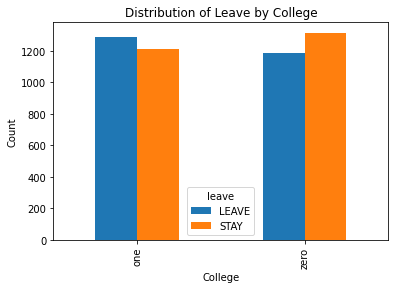

In [12]:
#Plot 1
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
df.groupby(['college', 'leave'])['id'].count().unstack().plot(kind='bar')
plt.title("Distribution of Leave by College")
plt.xlabel("College")
plt.ylabel("Count")
plt.show()

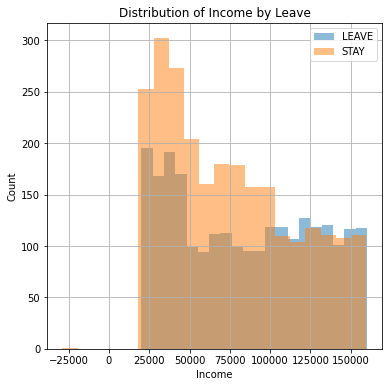

In [13]:
#Plot 2
plt.figure(figsize=(6, 6))
df.groupby('leave')['income'].hist(alpha=0.5, bins=20)
plt.title("Distribution of Income by Leave")
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(df['leave'].unique())
plt.show()

<Figure size 432x432 with 0 Axes>

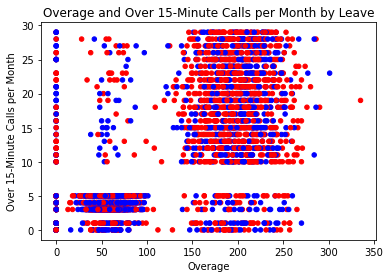

In [14]:
#Plot 3
plt.figure(figsize=(6, 6))
colors = {'LEAVE':'red', 'STAY':'blue'}
df.plot(kind='scatter', x='overage', y='over_15mins_calls_per_month', c=df['leave'].apply(lambda x: colors[x]))
plt.title("Overage and Over 15-Minute Calls per Month by Leave")
plt.xlabel("Overage")
plt.ylabel("Over 15-Minute Calls per Month")
plt.show()